Problem 1.2.a

In [7]:
import pandas as pd

diabetes_data = pd.read_csv("/Users/shreenidhishetty/Documents/Data Mining/dataset_diabetes/diabetic_data.csv")

# Get the number of entries in the data set
ds_num = diabetes_data.shape[0]
print("Total number of entries in the data set:", ds_num)

Total number of entries in the data set: 101766


1.2.b

In [4]:
missing_val = diabetes_data.isna().sum().sum()
print("Number of missing values in the data set:", missing_val)


Number of missing values in the data set: 0


In [13]:


df_na = pd.read_csv('/Users/shreenidhishetty/Documents/Data Mining/dataset_diabetes/diabetic_data.csv', na_values='?',low_memory=False)
missing_val_count = df_na.isnull().sum()
print("Number of missing values in each column:")
print(missing_val_count)

Number of missing values in each column:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepi

In [10]:
total_missing_vals = df_na.isnull().sum().sum()
print("Total number of missing values in the data set:", total_missing_vals)


Total number of missing values in the data set: 192849


1.2.c

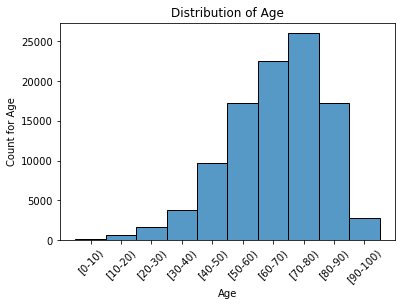

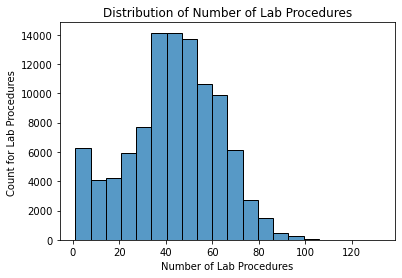

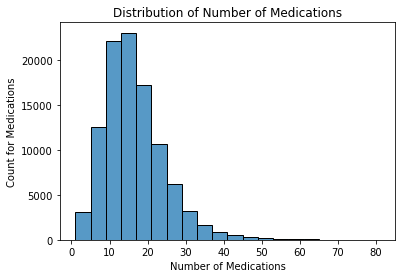

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
df_plt = pd.read_csv('/Users/shreenidhishetty/Documents/Data Mining/dataset_diabetes/diabetic_data.csv', na_values='?',low_memory=False)

sns.histplot(data=df_plt, x='age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count for Age')
plt.xticks(rotation=45)
plt.show()

sns.histplot(data=df_plt, x='num_lab_procedures', bins=20)
plt.title('Distribution of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Count for Lab Procedures ')
plt.show()

sns.histplot(data=df_plt, x='num_medications', bins=20)
plt.title('Distribution of Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count for Medications')
plt.show()

1.3

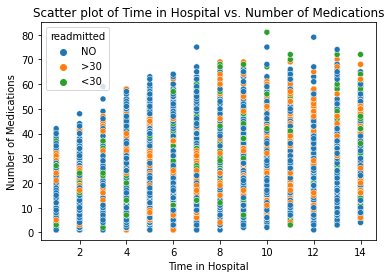

In [29]:
sns.scatterplot(data=df_plt, x='time_in_hospital', y='num_medications', hue='readmitted')
plt.xlabel('Time in Hospital')
plt.ylabel('Number of Medications')
plt.title('Scatter plot of Time in Hospital and Number of Medications')
plt.show()





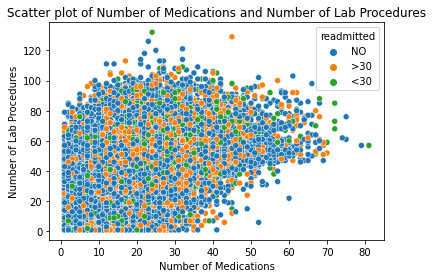

In [32]:
sns.scatterplot(data=df_plt, x='num_medications', y='num_lab_procedures', hue='readmitted')
plt.xlabel('Number of Medications')
plt.ylabel('Number of Lab Procedures')
plt.title('Scatter plot of Number of Medications and Number of Lab Procedures')
plt.show()

PROBLEM 3

In [37]:
import numpy as np
def ck(data, k, threshold):
    data_array = np.asarray(data)
    random_indices = np.random.choice(len(data_array), k, replace=False)
    centroids = data_array[random_indices]
    cluster_assignments = np.zeros(len(data_array))
    prev_centroids = centroids.copy()
    for iteration in range(100):
        cluster_assignments = assign_data_to_clusters(data_array, centroids)
        prev_centroids = centroids.copy()
        centroids = compute_centroids(data_array, cluster_assignments, k)
        avg_distance = np.sum(np.linalg.norm(centroids - prev_centroids, axis=1)) / k
        
        if avg_distance < threshold:
            break
    
    return centroids
    

def assign_data_to_clusters(data, centroids):
    cluster_assignments = np.zeros(len(data))
    
    for i, datapoint in enumerate(data):
        distances = [np.linalg.norm(datapoint - centroid) for centroid in centroids]
        cluster_assignments[i] = np.argmin(distances)
    
    return cluster_assignments
    

def compute_centroids(data, cluster_assignments, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[cluster_assignments == i], axis=0)
    
    return centroids

In [38]:
dat=[(2,5),(1,5),(22,55),(42,12),(15,16)]

In [39]:
ck(dat,2,10)

array([[26.33333333, 27.66666667],
       [ 1.5       ,  5.        ]])